In [87]:
from torch.utils.data import Dataset
import torch
import glob
import pandas as pd
from datetime import datetime
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import librosa
import librosa.display
from scipy import signal

In [18]:
sensors = ['C1.1.1'] #['C1.1.1', 'C16.1.3', 'C4.2.3']
start_time, end_time = "05/12/2021 23:54", "05/12/2021 23:56"
path = "/home/yhbedoya/Repositories/SHM-MAE/traffic/20211205/"

start = datetime.strptime(start_time, '%d/%m/%Y %H:%M')
end = datetime.strptime(end_time, '%d/%m/%Y %H:%M')

ldf = list()
for p in glob.glob(path + "*.csv"):
    name = os.path.split(p)[-1]
    nstr = datetime.strptime(name, 'traffic_%Y%m%dH%H%M%S.csv')
    if start <= nstr < end:
        df_tmp = pd.read_csv(p)
        c_drop = set(df_tmp.columns) - set(["sens_pos", "z", "ts"])
        if len(c_drop) > 0:
            df_tmp.drop(columns=list(c_drop), inplace=True)
        ldf.append(df_tmp)
df = pd.concat(ldf).sort_values(by=['sens_pos', 'ts'])
df.reset_index(inplace=True, drop=True)

df = df[df['sens_pos'].isin(sensors)]
df['ts'] = pd.to_datetime(df['ts'], unit='ms')
signald = np.array(df['z'])

In [19]:
signald.shape
signalN = signald-np.mean(signald)

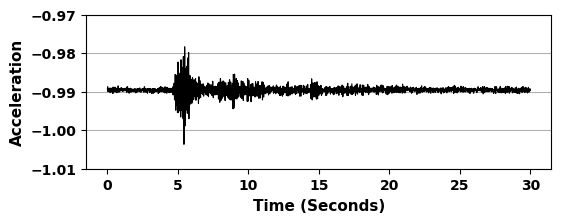

In [96]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(6,2))
y = signald[3000:6000]
x = [x/100 for x in range(len(y))]

plt.plot(x, y, color="black", linewidth=0.8)
plt.ylim([-1.010, -0.970])
plt.xlabel("Time (Seconds)", fontsize=11)
plt.ylabel("Acceleration", fontsize=11)
plt.gca().yaxis.grid(True, linestyle='-', alpha=1)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))

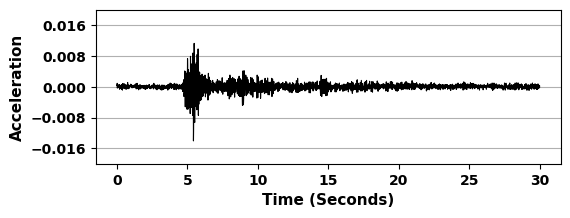

In [97]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(6,2))
y = signalN[3000:6000]
x = [x/100 for x in range(len(y))]

plt.plot(x, y, color="black", linewidth=0.8)
plt.ylim([-0.02, 0.02])
plt.xlabel("Time (Seconds)", fontsize=11)
plt.ylabel("Acceleration", fontsize=11)
plt.gca().yaxis.grid(True, linestyle='-', alpha=1)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))

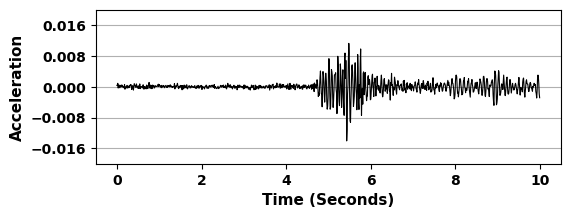

In [111]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(6,2))
y = signalN[3000:4000]
x = [x/100 for x in range(len(y))]

plt.plot(x, y, color="black", linewidth=0.8)
plt.ylim([-0.02, 0.02])
plt.xlabel("Time (Seconds)", fontsize=11)
plt.ylabel("Acceleration", fontsize=11)
plt.gca().yaxis.grid(True, linestyle='-', alpha=1)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))

In [139]:
def plotSpect(frequencies, times, spectrogram):
    plt.figure(figsize=(9,6))
    #plt.title(f'spectrogram from PSD')
    plt.pcolormesh(times, frequencies, 10*(np.squeeze(np.log10(spectrogram))))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(format="%+2.f", label='dB')

In [140]:
y = signalN[3000:4000]
sampleRate = 100
frameLength = 198
stepLength = 10

frequencies, times, spectrogram = signal.spectrogram(y,sampleRate,nfft=frameLength,noverlap=(frameLength - stepLength), nperseg=frameLength,mode='psd')

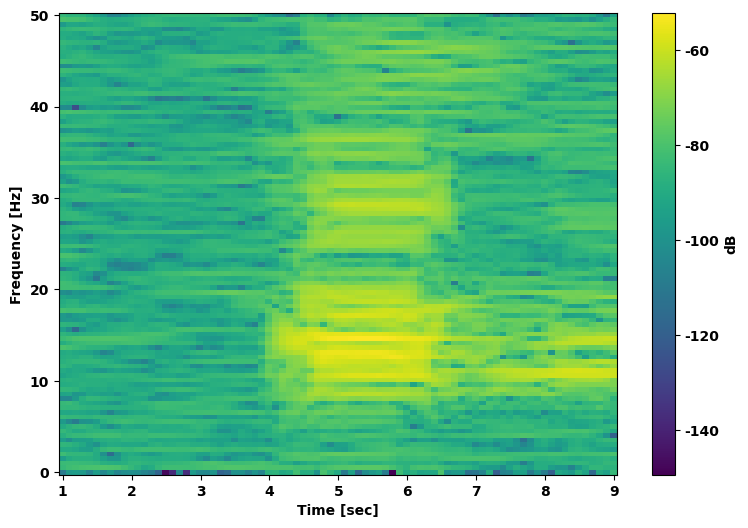

In [142]:
min = -24.496400092774163
max = -3.3793421008937514

plotSpect(frequencies, times, spectrogram)